# <h1>Projeto de dados de finanças<h1/>

<p>Neste projeto de dados nos concentramos na analise de dados exploratorios dos preços de ações.<p/>

<b>Imports<b/>

In [23]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(12,9)})

<b>Dados<b/>

In [24]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2020,10,1)

#Banco da América
BAC = data.DataReader('BAC','yahoo', start, end)
#CityGroup
C = data.DataReader('C','yahoo', start, end)
#Goldaman Sachs
GS = data.DataReader('GS','yahoo', start, end)
#JPMorgan Chase
JPM = data.DataReader('JPM','yahoo', start, end)
#Morgan Stanly
MS = data.DataReader('MS', 'yahoo', start, end)
#Well Fargo
WFC = data.DataReader('WFC','yahoo', start, end)

In [25]:
BAC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.811729
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.442013
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.486385
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.434616
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.456806
...,...,...,...,...,...,...
2020-09-25,23.549999,23.129999,23.280001,23.490000,42111300.0,23.490000
2020-09-28,24.309999,23.790001,23.879999,24.090000,47996900.0,24.090000
2020-09-29,23.990000,23.530001,23.980000,23.770000,45695200.0,23.770000


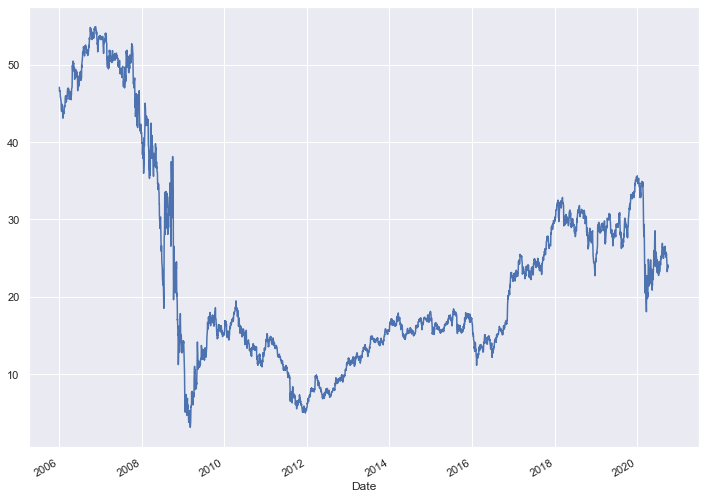

In [26]:
BAC['Close'].plot()

In [27]:
#Lista de tickers
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [28]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [29]:
bank_stocks.columns.names = ['Banks Ticker', 'Stock Info']

In [30]:
bank_stocks.head()

Banks Ticker        BAC                                               \
Stock Info         High        Low       Open      Close      Volume   
Date                                                                   
2006-01-03    47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04    47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05    46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06    46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09    46.970001  46.360001  46.720001  46.599998  15619400.0   

Banks Ticker                      C                                      ...  \
Stock Info    Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2006-01-03    34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04    34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05    34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06    34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09    34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Banks Ticker         MS                                         WFC  \
Stock Info         Open      Close     Volume  Adj Close       High   
Date                                                                  
2006-01-03    57.169998  58.310001  5377000.0  36.896912  31.975000   
2006-01-04    58.700001  58.349998  7977800.0  36.922207  31.820000   
2006-01-05    58.549999  58.509998  5778000.0  37.023464  31.555000   
2006-01-06    58.770000  58.570000  6889800.0  37.061440  31.775000   
2006-01-09    58.630001  59.189999  4144500.0  37.453743  31.825001   

Banks Ticker                                                          
Stock Info          Low       Open      Close      Volume  Adj Close  
Date                                                                  
2006-01-03    31.195000  31.600000  31.900000  11016400.0  20.231974  
2006-01-04    31.365000  31.799999  31.530001  10870000.0  19.997309  
2006-01-05    31.309999  31.500000  31.495001  10158000.0  19.975113  
2006-01-06    31.385000  31.580000  31.680000   8403800.0  20.092442  
2006-01-09    31.555000  31.674999  31.674999   5619600.0  20.089270  

[5 rows x 36 columns]

<h1>Análise de dados<h1/>

In [31]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Banks Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    141.089996
MS      89.300003
WFC     65.930000
dtype: float64

In [32]:
#Retornos para ação do banco.
returns = pd.DataFrame()

In [33]:
for tick in tickers:
     returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


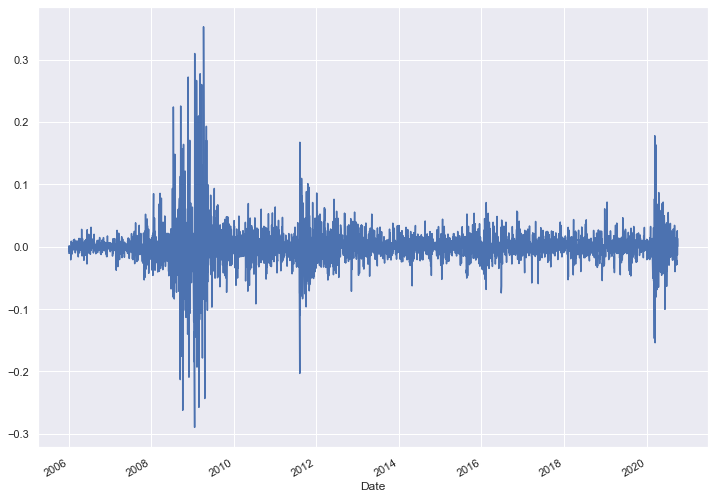

In [34]:
#Retorno dos ativos ao longo do tempo.
returns['BACReturn'].plot()

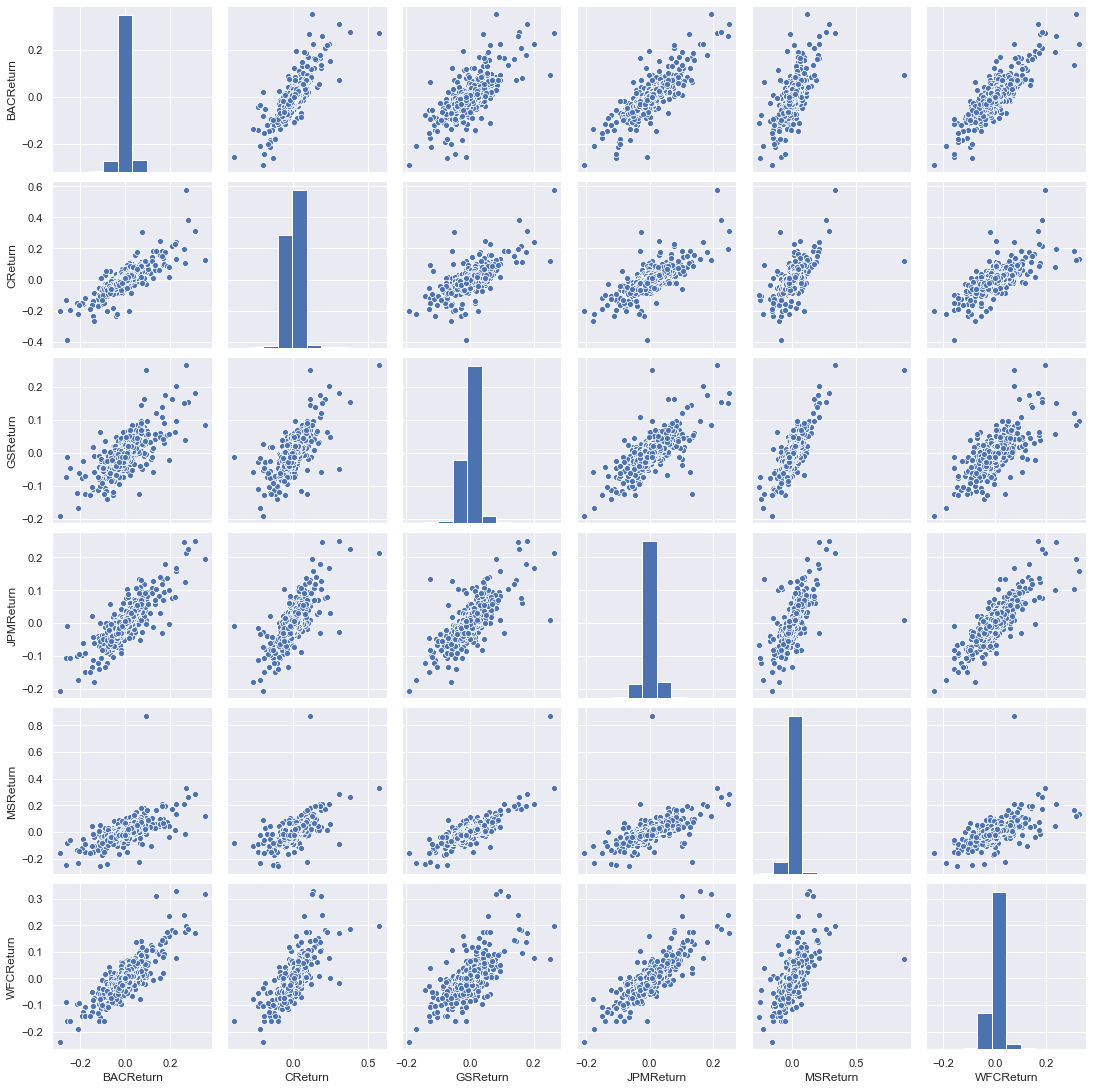

In [35]:
sns.pairplot(returns[1:])

In [36]:
#Dia com pior retorno
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [37]:
#Dia com melhor retorno
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [38]:
#Ação mais arriscada pelo desvio padrão para 2015.
returns[(returns.index.date > datetime.date(2015,1,1)) & (returns.index.date < datetime.date(2016,1,1))].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

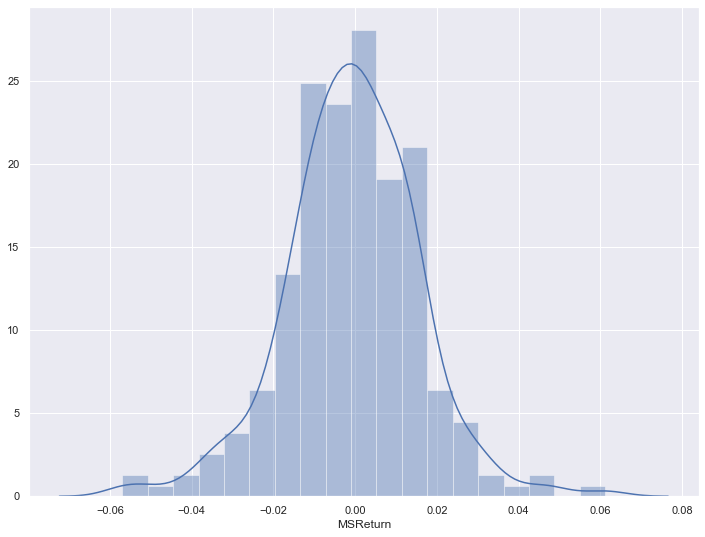

In [39]:
#Retornos para 2015 Morgan Stanley
sns.distplot(returns[(returns.index.date > datetime.date(2015,1,1)) & (returns.index.date < datetime.date(2016,1,1))]['MSReturn'])

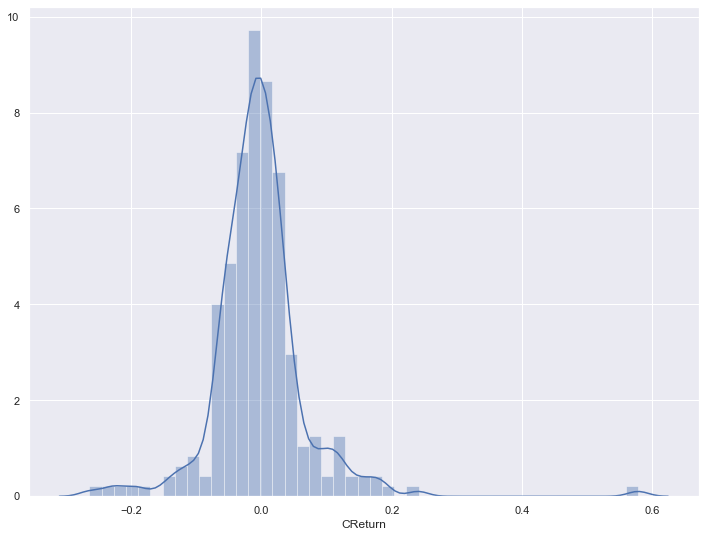

In [40]:
#Retornos para 2008 CityGroup
sns.distplot(returns[(returns.index.date > datetime.date(2008,1,1)) & (returns.index.date < datetime.date(2009,1,1))]['CReturn'])

In [41]:
sns.set_style('whitegrid')

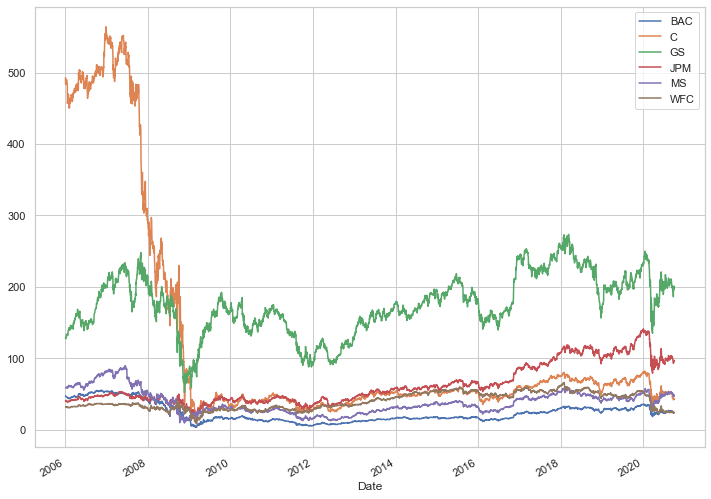

In [42]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick)
plt.legend()

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 15.3 µs


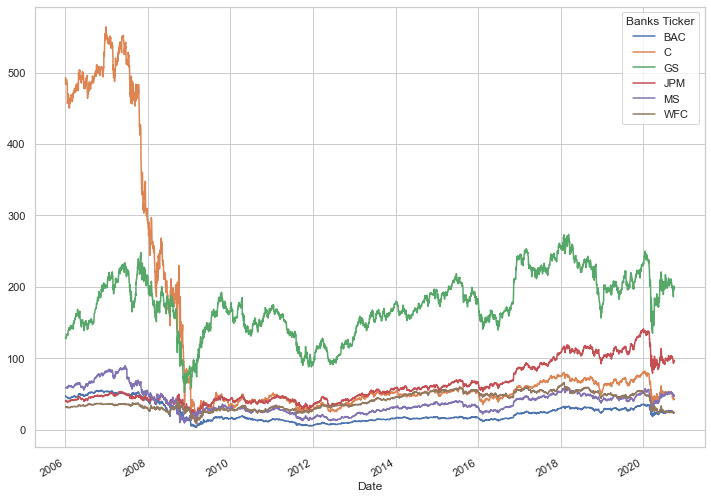

In [43]:
%time
bank_stocks.xs(key='Close',level='Stock Info', axis=1).plot()